In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# EDA

In [ ]:
df.shape

(101, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [ ]:
df['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [ ]:
df['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

# Data Visualization

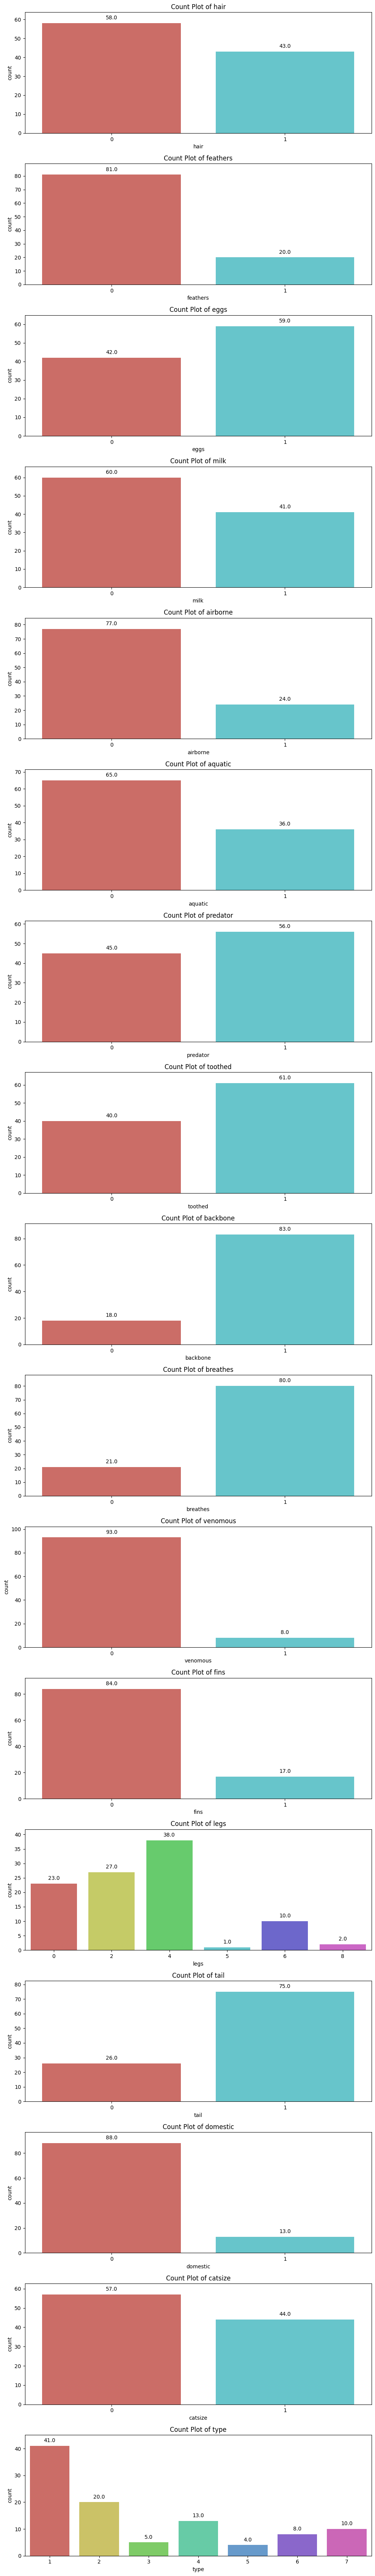

In [ ]:
# Constructing the count plot for all columns
columns = df.columns[1:]

# Set up subplots based on the number of columns
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, len(columns) * 4))

# Iterate through each column and create a count plot
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i], palette = 'hls')
    axes[i].set_title(f'Count Plot of {column}')

    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    axes[i].set_ylim(top=df[column].value_counts().max() * 1.1)

plt.tight_layout()
plt.show()

### Data Partition

In [ ]:
X = df.iloc[:,1:-1]
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
Y = df['type']
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

# Model Building

In [ ]:
k1_train = []
k1_test = []
k1_train_error = []
k1_test_error = []


In [ ]:
# Taking k values from 1 to 20
for k in range(1,21):
    training_accuracy = []
    test_accuracy = []
    training_error = []
    test_error = []

    for i in range(1, 100):
        KNN = KNeighborsClassifier(n_neighbors=k)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=i)

        KNN.fit(X_train, Y_train)

        Y_pred_train = KNN.predict(X_train)
        Y_pred_test = KNN.predict(X_test)

        training_accuracy.append(accuracy_score(Y_train, Y_pred_train))
        test_accuracy.append(accuracy_score(Y_test, Y_pred_test))

        training_error.append(1 - accuracy_score(Y_train, Y_pred_train))
        test_error.append(1 - accuracy_score(Y_test, Y_pred_test))

    k1_train.append(np.mean(training_accuracy).round(3))
    k1_test.append(np.mean(test_accuracy).round(3))

    k1_train_error.append(np.mean(training_error).round(3))
    k1_test_error.append(np.mean(test_error).round(3))


In [ ]:
print(k1_train)
print(k1_test)
print(k1_train_error)
print(k1_test_error)

[1.0, 0.98, 0.966, 0.942, 0.914, 0.887, 0.863, 0.833, 0.814, 0.798, 0.79, 0.788, 0.785, 0.782, 0.779, 0.774, 0.768, 0.756, 0.743, 0.73]
[0.955, 0.905, 0.888, 0.859, 0.829, 0.813, 0.797, 0.785, 0.773, 0.767, 0.761, 0.757, 0.753, 0.747, 0.741, 0.735, 0.728, 0.716, 0.7, 0.687]
[0.0, 0.02, 0.034, 0.058, 0.086, 0.113, 0.137, 0.167, 0.186, 0.202, 0.21, 0.212, 0.215, 0.218, 0.221, 0.226, 0.232, 0.244, 0.257, 0.27]
[0.045, 0.095, 0.112, 0.141, 0.171, 0.187, 0.203, 0.215, 0.227, 0.233, 0.239, 0.243, 0.247, 0.253, 0.259, 0.265, 0.272, 0.284, 0.3, 0.313]


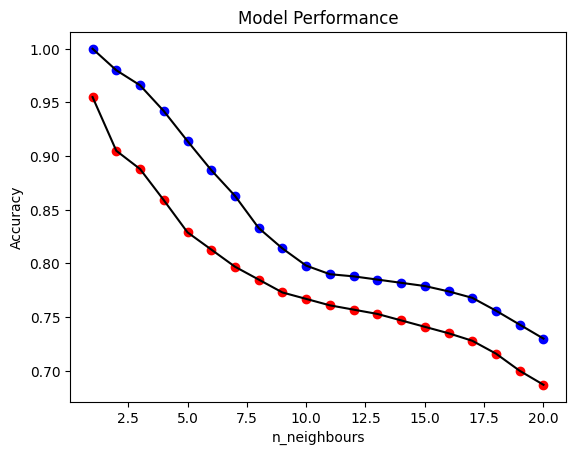

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=range(1,21),y=k1_train,color='blue')
plt.scatter(x=range(1,21),y=k1_test,color='red')
plt.title("Model Performance")
plt.xlabel("n_neighbours")
plt.ylabel("Accuracy")
plt.plot(range(1,21),k1_train,color='black')
plt.plot(range(1,21),k1_test,color='black')
plt.show()

##### From the above plot, we can observe that the **Model Performance** is reducing as the **k value** is increasing

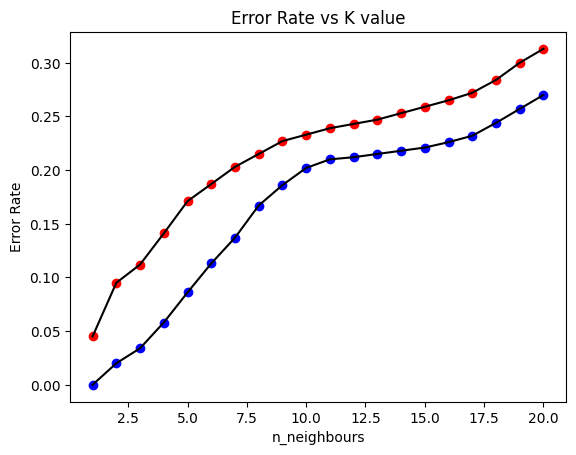

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x = range(1,21),y = k1_train_error,color='blue')
plt.scatter(x = range(1,21),y = k1_test_error,color='red')
plt.title("Error Rate vs K value")
plt.xlabel("n_neighbours")
plt.ylabel("Error Rate")
plt.plot(range(1,21),k1_train_error,color='black')
plt.plot(range(1,21),k1_test_error,color='black')
plt.show()

##### From the above plot, we can observe that the **Error Rate** of the model increases as the **k value** increases.

## Grid Search for Algorithm Tuning

In [ ]:
n_neighbors = np.array(range(1,21))
param_grid = dict(n_neighbors=n_neighbors)

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


### Visualizing the CV results

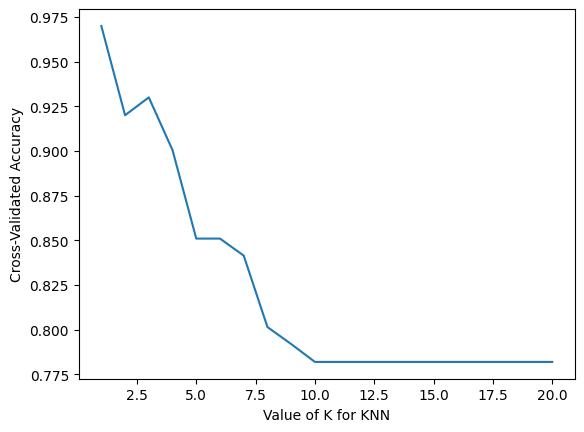

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 21
k_range = range(1, 21)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()